# Finance Data Project 

This is my second data capstone project for my Udemy Data Science and ML Bootcamp. In this data project I will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I'll be focusing on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.


In this project I will be using pandas to directly read data from yahoo finance using pandas!



In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

I will be using stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 

In [2]:
bank_stocks = pd.read_pickle('../input/all_banks')

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit and try to answer some basic questions

** What is the max Close price for each bank's stock throughout the time period?**

In [5]:
bank_stocks.xs('Close', level=1, axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** I'm going to create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. **

In [7]:
for x in tickers:
    returns[x + ' Return'] = bank_stocks.xs('Close',axis=1,level=1)[x].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [8]:
import seaborn as sns
sns.set_style('whitegrid')

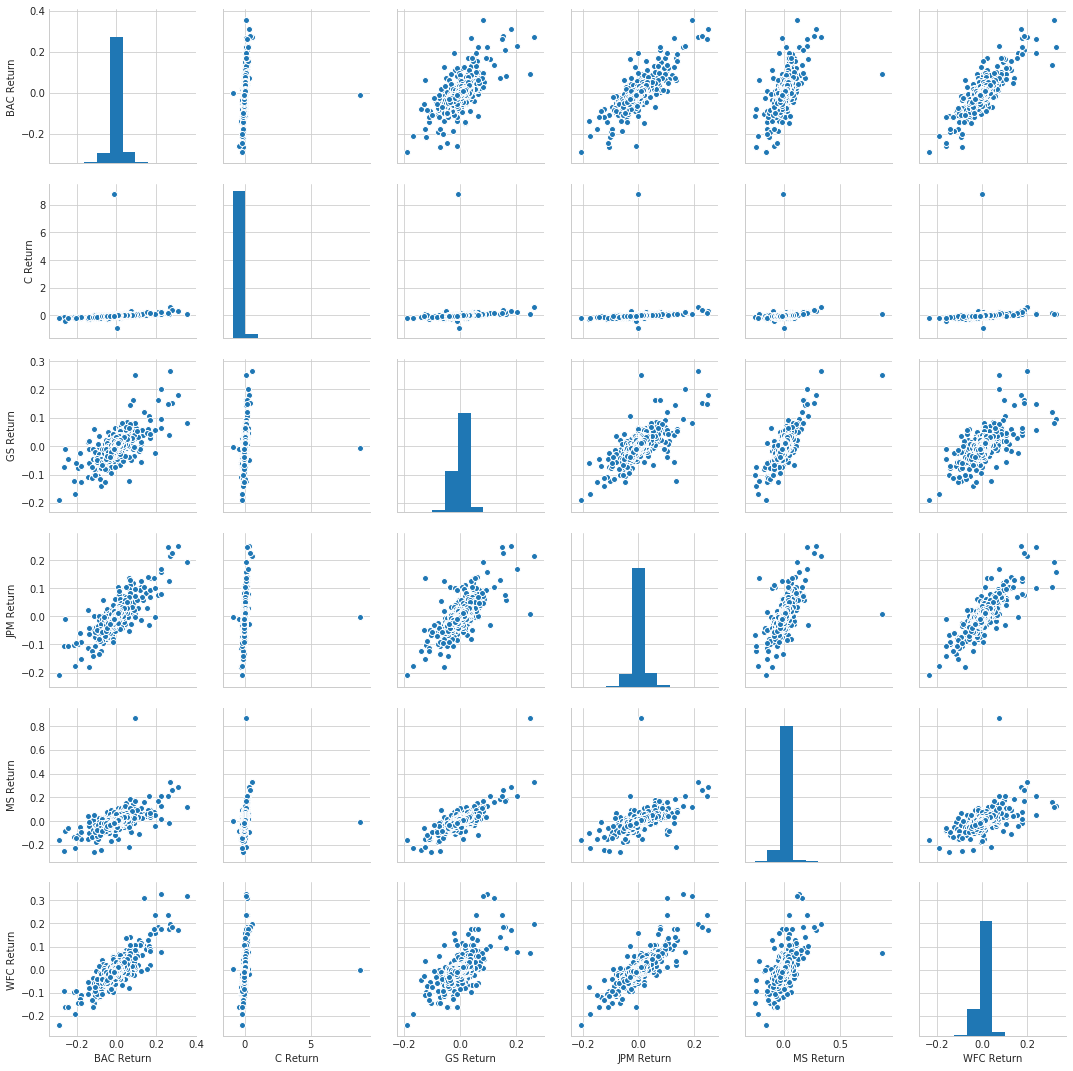

In [9]:
sns.pairplot(returns[1:])

In the above figure Citigroup's stock clearly stands out.This behavior was due their stock crashing during the financial crisis.
A background on [Citigroup's Stock Crash is available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look at the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, lets try to figure out on what dates each bank stock had the best and worst single day returns. **

In [10]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

You can notice that 4 of the banks share the same day for the worst drop. This occured on Inauguration Day when Barack Obama took office.

In [11]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another. This was because [Citigroup had a stock split](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may) in May 2011. Even JP Morgan had a stock split, one day after Inauguration day.

In [12]:
returns.std() 

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Take a look at the standard deviation of the returns, clearly Citigroup is the riskiest due to greater deviation. However after the Financial Crisis you can see that all banks had a very similar risk profiles.

In [13]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

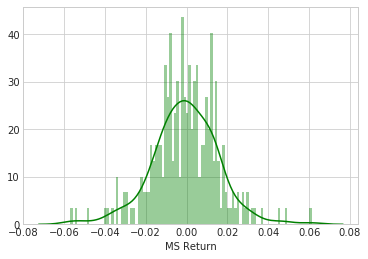

In [14]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=100,color='green')

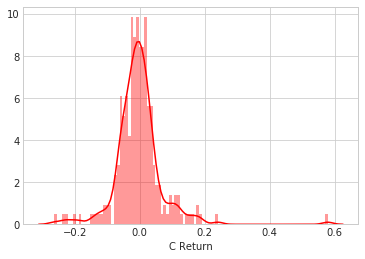

In [15]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100,color='red')

____
# More Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
from plotly import __version__

In [17]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [18]:
init_notebook_mode(connected=True)

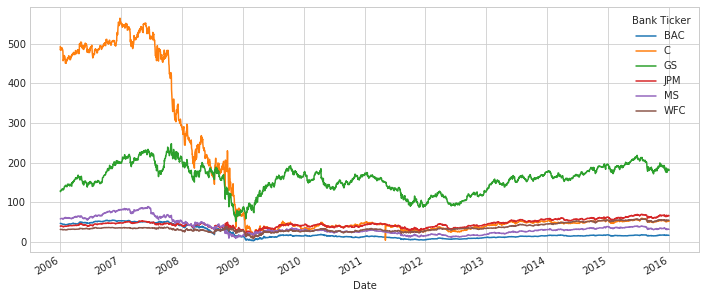

In [19]:
bank_stocks.xs('Close',axis=1,level=1).plot(figsize=(12,5))

In the above figure you can clearly see the enormous crash in value of Citigroup's stock.

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 


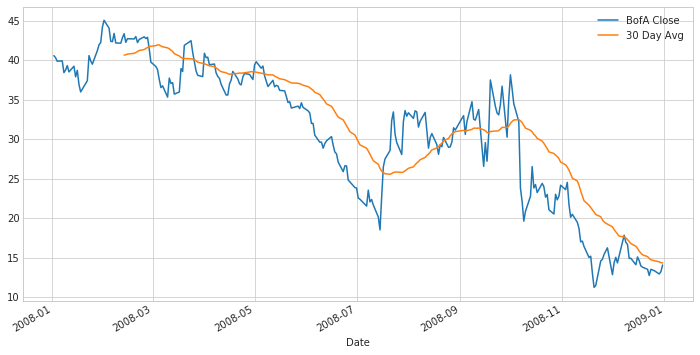

In [20]:
bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].plot(figsize=(12,6),label='BofA Close')
rolling_avg = pd.DataFrame()
rolling_avg['30 Day Avg'] = bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].rolling(window=30).mean()
rolling_avg['30 Day Avg'].plot(figsize=(12,6),label='30 Day Avg')
plt.legend()

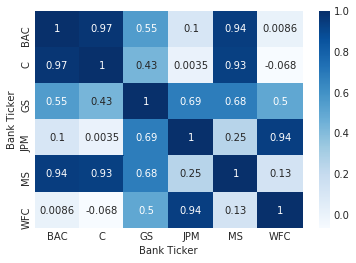

In [21]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues')

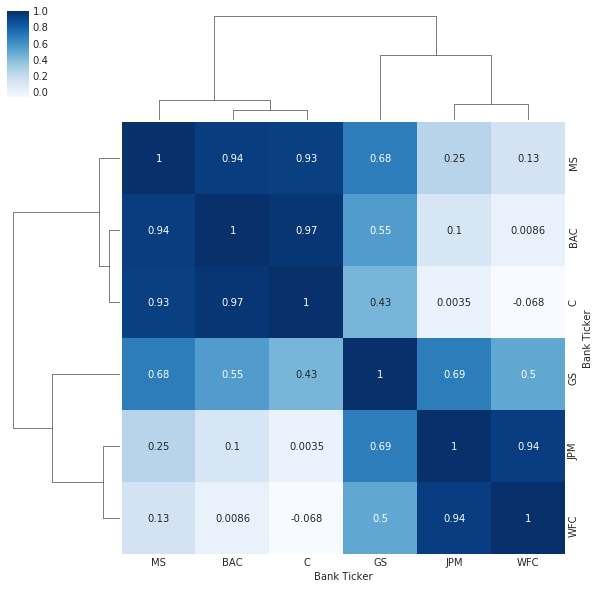

In [22]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues')

That's all for now. More to come soon...